In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

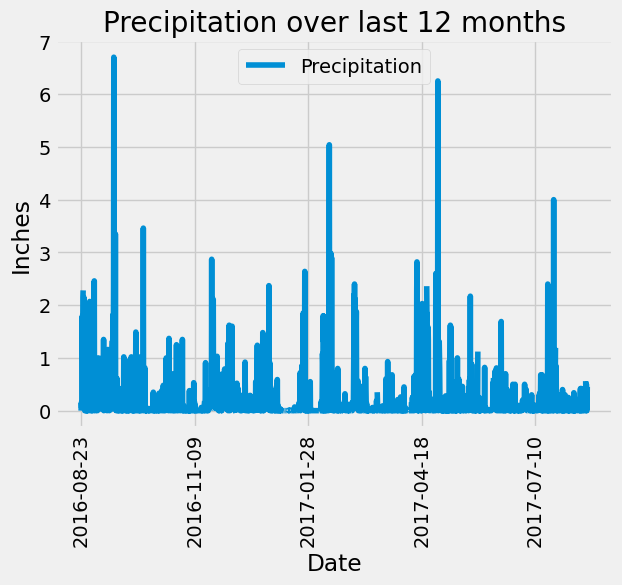

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

prcp_data
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_score_df = pd.DataFrame(prcp_data, columns= ["Date", "Precipitation"])

# Sort the dataframe by date
prcp_score_df.set_index("Date", inplace=True)
prcp_score_df
# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = prcp_score_df.plot(title="Precipitation over last 12 months", rot=90)
prcp_plot.set_xlabel("Date")
prcp_plot.set_ylabel("Inches")
plt.show()

In [39]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_score_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [53]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [89]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
most_active_station

# Calculating lowest temperature of most active station
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()[0]
lowest_temp

# Calculating highest temperature of most active station
highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()[0]
highest_temp

# Calculating average temperature of most active station
avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()[0]
avg_temp

# Displaing the lowest, highest and average temperature of the most active station
stats_temp = [lowest_temp, highest_temp, avg_temp]
stats_temp

[54.0, 85.0, 71.66378066378067]

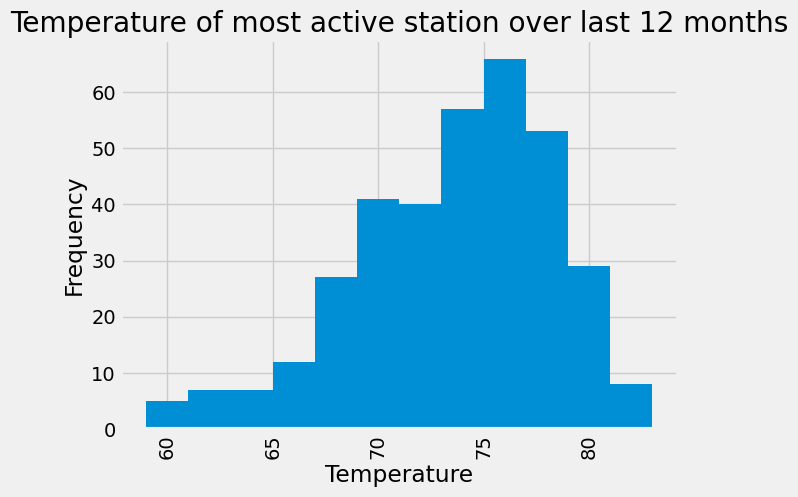

In [90]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_station_data = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.station == most_active_station).all()
    
most_station_data

most_station_df = pd.DataFrame(most_station_data, columns = ["Station", "Temperature"])
most_station_df

# Plotting DataFrame
most_station_plot = most_station_df["Temperature"].plot.hist(bins = 12, title="Temperature of most active station over last 12 months", rot=90)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [91]:
# Close Session
session.close()